In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

#import solver related modules
from MCEq.core import MCEqRun
import mceq_config as config
#import primary model choices
import crflux.models as pm

In [2]:
config.enable_muon_energy_loss = False
config.muon_helicity_dependence = False
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3c',
#primary cosmic ray flux model
primary_model = (pm.HillasGaisser2012, "H3a"),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=30.0
)

MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [4]:
#Power of energy to scale the flux (the results will be returned as E**mag * flux)
mag = 0

#obtain energy grid (fixed) of the solution for the x-axis of the plots
e_grid = mceq_run.e_grid
mceq_run.e_widths

#Dictionary for results
flux = {}

#Define a zenith angle, counted positively from vertical direction. Theta = 0. means vertical, theta = 90. horizontal
theta = 30

In [5]:
#Set the zenith angle
mceq_run.set_theta_deg(theta)
n_pts = 100
X_grid = np.linspace(0.1, mceq_run.density_model.max_X, n_pts)
mceq_run.set_single_primary_particle(1e2, pdg_id = 2212)
mceq_run.solve(int_grid=X_grid)

In [6]:
# Populate longitudinal spectra for all particles:
part_long_spectra = {}
for p in mceq_run.pman.all_particles:
    longitudinal_spectrum = []
    for idx in range(n_pts):
        longitudinal_spectrum.append(mceq_run.get_solution(p.name, grid_idx=idx))
    
    part_long_spectra[p.name] = (p, longitudinal_spectrum)

[50]


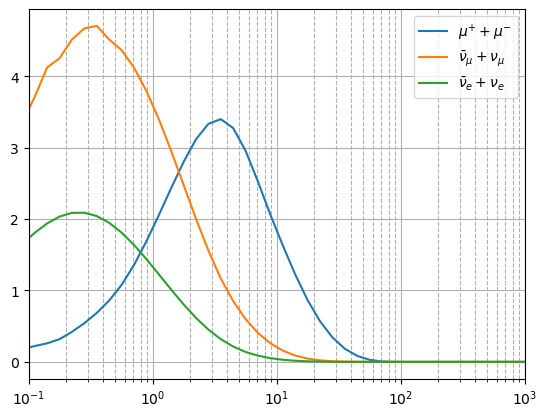

In [7]:
xbin1 = X_grid + (X_grid[1]+X_grid[0])/2
xbin1 = np.array([0e0] + list(xbin1))
# print(X_grid[1]-X_grid[0])
# print(xbin1, X_grid)

xd = 587
xgrid_inx = np.digitize([xd], xbin1)
print(np.digitize([xd], xbin1))
# numpy.digitize(x, bins, right=False)[source]


plt.semilogx(e_grid, (part_long_spectra["mu+"][1][xgrid_inx[0]]+
             part_long_spectra["mu+_l"][1][xgrid_inx[0]]+
             part_long_spectra["mu+_r"][1][xgrid_inx[0]]+
             part_long_spectra["mu-"][1][xgrid_inx[0]]+
             part_long_spectra["mu-_r"][1][xgrid_inx[0]]+
             part_long_spectra["mu-_l"][1][xgrid_inx[0]])*e_grid, label = r"${\mu}^{+} + {\mu}^{-}$")

plt.semilogx(e_grid, (part_long_spectra["numu"][1][xgrid_inx[0]]+
             part_long_spectra["antinumu"][1][xgrid_inx[0]])*e_grid, label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$")
plt.semilogx(e_grid, (part_long_spectra["nue"][1][xgrid_inx[0]]+
             part_long_spectra["antinue"][1][xgrid_inx[0]])*e_grid, label = r"$\bar{\nu}_{e} + {\nu}_{e}$")
plt.xlim(1e-1, 1e3)
plt.grid()
plt.grid(visible=True, which='minor', linestyle='--')
plt.legend()
# plt.ylim(1e-7, 1e3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[50]


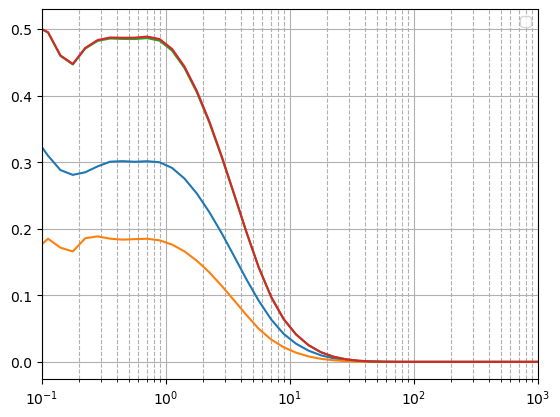

In [13]:
xbin1 = X_grid + (X_grid[1]+X_grid[0])/2
xbin1 = np.array([0e0] + list(xbin1))
# print(X_grid[1]-X_grid[0])
# print(xbin1, X_grid)

xd = 587
xgrid_inx = np.digitize([xd], xbin1)
print(np.digitize([xd], xbin1))
# numpy.digitize(x, bins, right=False)[source]

plt.semilogx(e_grid, part_long_spectra["mu+_l"][1][xgrid_inx[0]])
plt.semilogx(e_grid, part_long_spectra["mu+_r"][1][xgrid_inx[0]])
plt.semilogx(e_grid, part_long_spectra["mu+_r"][1][xgrid_inx[0]] + part_long_spectra["mu+_l"][1][xgrid_inx[0]])
plt.semilogx(e_grid, part_long_spectra["mu+"][1][xgrid_inx[0]])
# plt.semilogx(e_grid, (part_long_spectra["mu+"][1][xgrid_inx[0]]+
#              part_long_spectra["mu+_l"][1][xgrid_inx[0]]+
#              part_long_spectra["mu+_r"][1][xgrid_inx[0]]+
#              part_long_spectra["mu-"][1][xgrid_inx[0]]+
#              part_long_spectra["mu-_r"][1][xgrid_inx[0]]+
#              part_long_spectra["mu-_l"][1][xgrid_inx[0]])*e_grid, label = r"${\mu}^{+} + {\mu}^{-}$")

# plt.semilogx(e_grid, (part_long_spectra["numu"][1][xgrid_inx[0]]+
#              part_long_spectra["antinumu"][1][xgrid_inx[0]])*e_grid, label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$")
# plt.semilogx(e_grid, (part_long_spectra["nue"][1][xgrid_inx[0]]+
#              part_long_spectra["antinue"][1][xgrid_inx[0]])*e_grid, label = r"$\bar{\nu}_{e} + {\nu}_{e}$")
plt.xlim(1e-1, 1e3)
plt.grid()
plt.grid(visible=True, which='minor', linestyle='--')
plt.legend()
# plt.ylim(1e-7, 1e3)

In [7]:
# Integrate all spectra
part_long_mult = {}
for pname, (pobj, long_spec) in part_long_spectra.items():
    res_mult = []
    for i, spec in enumerate(long_spec):
        etot_grid = e_grid + pobj.mass
        res_mult.append(integrate.simpson(spec*etot_grid, np.log(etot_grid)))
        
    part_long_mult[pname] = (part_long_spectra[pname][0], res_mult)

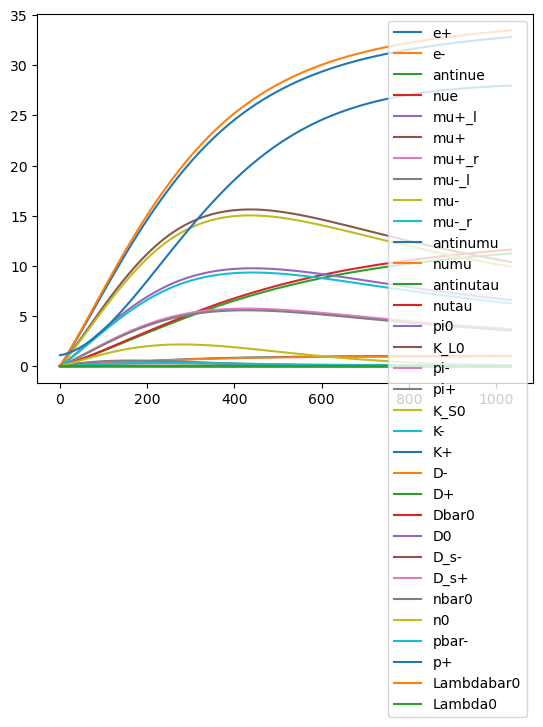

In [9]:
# Plot
for pname, (pobj, res_mult) in part_long_mult.items():
    # if not pname in ["mu+_l", "mu+", "mu+_r", "mu-_l", "mu-", "mu-_r", "gamma"]:
    if not pname in ["gamma"]:
    # if ("nu" not in pname) and (not pname in ["gamma"]) and ("p+" not in pname):
        plt.plot(X_grid, res_mult, label = pname)
    
plt.legend()    